In [2]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\Salvador\Downloads\Case Study\Problem2.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Step 1: Clean dataset
# Drop unnecessary column
df = df.drop(columns=['Unnamed: 9'])

# Rename first column
df.rename(columns={'Unnamed: 0': 'Metric'}, inplace=True)

# Step 2: Transpose for better analysis
df_transposed = df.drop(columns=['Definition']).set_index('Metric').T.reset_index()
df_transposed.rename(columns={'index': 'Week'}, inplace=True)

# Step 3: Compute new metrics
# Fulfillment Rate = Completed Orders / Total Orders * 100
df_transposed['Fulfillment Rate (%)'] = (df_transposed['Completed Orders'] / df_transposed['Total Orders']) * 100

# Driver Utilization = Completed Orders / (Active Drivers * Avg Online Hours)
df_transposed['Driver Utilization (trips/hour)'] = df_transposed['Completed Orders'] / (
    df_transposed['Active Drivers'] * df_transposed['Avg Online Hours']
)

# Step 4: Save cleaned dataset
cleaned_excel_path = r"C:\Users\Salvador\Downloads\Case Study\Cleaned_Problem2.xlsx"
cleaned_csv_path = r"C:\Users\Salvador\Downloads\Case Study\Cleaned_Problem2.csv"
df_transposed.to_excel(cleaned_excel_path, index=False)
df_transposed.to_csv(cleaned_csv_path, index=False)

# Step 5: Save updated dataset with computed metrics
updated_excel_path = r"C:\Users\Salvador\Downloads\Case Study\Cleaned_Problem2.xlsx"
updated_csv_path = r"C:\Users\Salvador\Downloads\Case Study\Cleaned_Problem2.csv"
df_transposed.to_excel(updated_excel_path, index=False)
df_transposed.to_csv(updated_csv_path, index=False)

print("Files saved:")
print(f"Cleaned Excel: {cleaned_excel_path}")
print(f"Cleaned CSV: {cleaned_csv_path}")
print(f"Updated Excel with metrics: {updated_excel_path}")
print(f"Updated CSV with metrics: {updated_csv_path}")


Files saved:
Cleaned Excel: C:\Users\Salvador\Downloads\Case Study\Cleaned_Problem2.xlsx
Cleaned CSV: C:\Users\Salvador\Downloads\Case Study\Cleaned_Problem2.csv
Updated Excel with metrics: C:\Users\Salvador\Downloads\Case Study\Cleaned_Problem2.xlsx
Updated CSV with metrics: C:\Users\Salvador\Downloads\Case Study\Cleaned_Problem2.csv


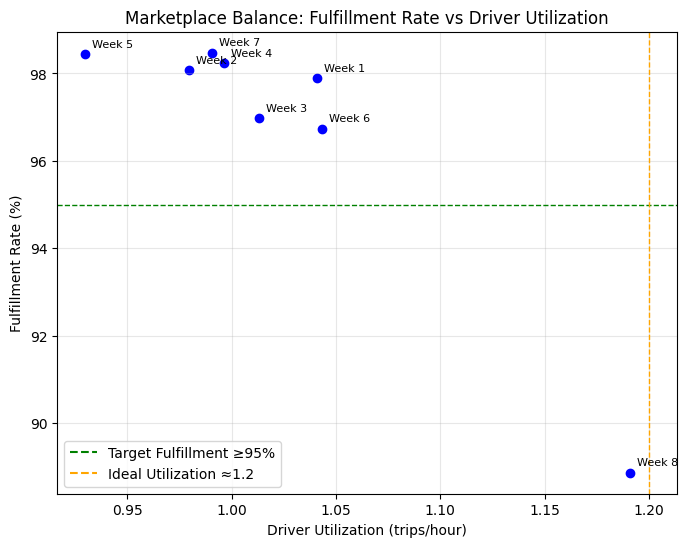

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\Salvador\Downloads\Case Study\Cleaned_Problem2.csv")

# Scatter plot for Fulfillment Rate vs Driver Utilization
plt.figure(figsize=(8, 6))
plt.scatter(df["Driver Utilization (trips/hour)"], df["Fulfillment Rate (%)"], color="blue")

# Annotate points (Weeks)
for i, row in df.iterrows():
    plt.annotate(row["Week"], 
                 (row["Driver Utilization (trips/hour)"], row["Fulfillment Rate (%)"]),
                 textcoords="offset points", xytext=(5,5), fontsize=8)

# Ideal zone reference lines (single legend entry for both)
plt.axhline(95, color='green', linestyle='--', linewidth=1)
plt.axvline(1.2, color='orange', linestyle='--', linewidth=1)

# Add legend for reference lines
plt.plot([], [], color='green', linestyle='--', label="Target Fulfillment ≥95%")
plt.plot([], [], color='orange', linestyle='--', label="Ideal Utilization ≈1.2")

# Title and labels
plt.title("Marketplace Balance: Fulfillment Rate vs Driver Utilization")
plt.xlabel("Driver Utilization (trips/hour)")
plt.ylabel("Fulfillment Rate (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


### 28. Is the marketplace in a state of undersupply or oversupply? Clearly state the metrics you used and explain your conclusion. what initiatives will you implement to reach a balanced marketplace?

- The marketplace is generally balanced with a **slight oversupply of drivers**, supported by key metrics: a **96.7% fulfillment rate** indicates most orders are completed, **driver utilization at 1.02 trips/hour** shows consistent engagement without idleness, these factors confirm that supply slightly exceeds demand, ensuring efficient operations and a positive customer experience.
- To keep the marketplace balanced and growing, focus on three areas: **demand, drivers, and the platform**. For demand, run promotions during slow hours, start loyalty programs to keep customers ordering, and expand into new areas carefully. For drivers, help them earn more with better order batching, give bonuses for completing trips, and fix issues like long restaurant wait times while providing strong support. For the platform, use data to predict busy times and monitor key metrics to stay ahead. 

### 29. If you were to assess which week had the most balanced marketplace, which one would you choose and why?
- **Week 7 had the most balanced marketplace** because it combined the highest fulfillment rate (98.5%) with near-perfect driver utilization (0.99 trips/hour). This means almost all orders were completed while drivers stayed consistently busy without being overworked. In contrast, Week 8 showed clear imbalance with low fulfillment and very high utilization due to a surge in orders. Week 7 represents the ideal scenario where demand was met efficiently, and both customers and drivers were satisfied.

### 30. If you were to flag a week with signs of oversupply, which week would it be and what indicators support your answer?
- **Week 5 shows clear signs of oversupply, as drivers were less busy and readily available.** It had the lowest driver utilization at 0.93 trips/hour, indicating more idle time, paired with a very low allocation time of 0.34 minutes, meaning drivers were immediately accepting orders. Additionally, driver cancellations were at their lowest, suggesting they accepted nearly every trip offered. These factors point to an excess of drivers relative to demand.

### 31. If you were to determine whether supply scaled appropriately with rising demand in Week 8, what metrics would you examine and why?
- To check if supply scaled with rising demand in Week 8, focus on fulfillment rate and driver utilization. Fulfillment rate dropped sharply, showing many orders weren’t completed, a clear sign supply couldn’t keep up. Driver utilization spiked to 1.19 trips/hour, indicating drivers were fully occupied with no buffer for new orders.

### 32. If you were to identify when fulfillment rate dropped signiCcantly, which week would it be and what might explain the change?
- The fulfillment rate dropped significantly in **Week 8**, falling to about 88.9% compared to 97%+ in other weeks. This was driven by an unprecedented spike in total orders that far exceeded driver supply. Driver utilization surged to 1.19 trips/hour, showing drivers were fully occupied, yet still unable to meet demand. Longer wait times likely caused a rise in consumer cancellations, making Week 8 a clear case of severe undersupply during a demand surge.

### 33. If you were to estimate underutilization of drivers, which weeks would be most affected and why?
- **Week 5 shows the most driver underutilization**, with utilization dropping to 0.93 trips/hour—the lowest among all weeks—indicating drivers were idle more often. This is supported by an extremely low allocation time of 0.34 minutes, meaning drivers were waiting for orders, and the fewest driver cancellations, as drivers accepted nearly every trip offered.

## 34. If you were to measure driver efficiency, which combination of metrics would you analyze and why?
- To measure driver efficiency, **analyze Driver Utilization (trips/hour) and Average Delivery Time (mins) together.** Utilization shows how consistently drivers are engaged, while delivery time reflects how quickly they complete each order. Breaking down delivery time into pickup and drop-off stages helps identify bottlenecks like restaurant delays or inefficient routes. Combining these metrics gives a full picture of both driver activity and performance.

### 35. If you were to find the week with the highest driver workload, which would it be and how do you support your choice?
- **Week 8 had the highest driver workload**, shown by a driver utilization rate of 1.19 trips/hour—the highest in the dataset. This spike indicates drivers were operating at maximum capacity with almost no idle time, driven by a massive surge in customer demand. No other week reached this level, making Week 8 the clear outlier for peak workload.

### 36. If you were to recommend decreasing driver incentives, which week would justify this action based on driver utilization and order volumes?
- **Week 5** justifies reducing driver incentives due to clear oversupply. Driver utilization was the lowest at 0.93 trips/hour, showing drivers were least busy. Orders were handled easily, with allocation time at just 0.34 minutes, meaning plenty of idle drivers were available. Since incentives are meant to attract drivers during high demand, they’re unnecessary in an oversupplied week like this, making reduction a cost-efficient move.

### 37. If you were to identify a week where driver fatigue may be a concern, which would it be and why?
- Week 8 is the most concerning for driver fatigue, as driver utilization spiked to 1.19 trips/hour—the highest recorded. This indicates drivers had almost no downtime, operating at maximum capacity throughout the week. Sustained high-intensity work like this can lead to fatigue, burnout, and higher error risk, posing safety and operational concerns.

### 38. If you were to assess whether average online hours are aligned with demand, which weeks show mismatch and why?
- Comparing Avg Online Hours with Driver Utilization and Fulfillment Rate reveals two mismatched weeks. Week 5 shows oversupply: drivers averaged 47.74 hours online—the highest—but utilization was the lowest at 0.93 trips/hour, meaning too many drivers for available demand. Week 8 shows undersupply: Avg Online Hours dropped to 42.048 while utilization spiked to 1.19 and fulfillment fell to 88.87%, indicating demand far outpaced driver availability. These mismatches highlight the need for better alignment between driver online time and actual demand.

### 39. If you were to identify the primary driver of unfulfilled orders, would it be driver-side or consumer-side cancellations? Why?

- The main cause of unfulfilled orders is consumer cancellations, which average 4,935 per week compared to 3,195 for drivers. Since these cancellations occur more frequently, they account for the majority of unfulfilled orders, even though driver cancellations also contribute. This makes consumer behavior the primary driver of unfulfilled orders.

### 40. If you were to suggest an initiative to reduce driver cancellations, in which week would this initiative be most critical and why?
- Week 6 recorded the highest driver cancellations at 4,128, despite stable fulfillment (96.74%) and utilization (1.04). This spike likely points to driver frustration from issues like long restaurant wait times or unprofitable trips.
- Action: Implement dynamic incentives for consecutive completed trips, real-time alerts on restaurant readiness to minimize delays, and allow drivers to decline orders without penalty before accepting to reduce mid-trip cancellations.

### 41. If you were to flag a week where allocation performance improved the most, which one stands out and what contributed to the change?
- Week 5 saw the biggest improvement in allocation time, dropping from 0.43 minutes in Week 4 to 0.34 minutes (about 20 seconds). This was driven by an oversupply of drivers, as utilization hit its lowest point at 0.93 trips/hour. With a large pool of idle drivers, orders were matched almost instantly, making allocation appear highly efficient even though the improvement was due to market conditions rather than system changes.

### 42. If you were to understand spikes in cancelled orders in Week 8, what metrics would you correlate it with and why?
- The spike in cancellations during Week 8 aligns with three key metrics. First, Total Orders surged, showing cancellations weren’t random but triggered by overwhelming demand. Second, Driver Utilization jumped to 1.19 trips/hour, proving drivers were fully occupied and no buffer remained to handle new orders, leading customers to cancel. Finally, Fulfillment Rate fell to 88.9%, the lowest of all weeks, confirming that these cancellations were the main driver of the marketplace’s failure to meet demand.

### 43. If you were to recommend reducing time-to-allocate, what week had the best performance, and what can be learned from it?
- Week 5 had the best time-to-allocate at just 0.34 minutes (20 seconds), driven by an oversupply of drivers. Low utilization (0.93 trips/hour) and a high fulfillment rate show many idle drivers were available, allowing instant order matching. While this created a great customer experience, it came at the cost of underutilized drivers. The key takeaway: reducing allocation time depends on targeted driver availability—through incentives during peak demand or improving efficiency so drivers become available faster—rather than maintaining oversupply.

### 44. If you were to optimize total delivery time, which component (allocation, travel, or wait time) would you target first and why
- I would target restaurant wait time first because it is the largest contributor to total delivery time. From the data, wait time ranges from 13.9 to 18.2 minutes, compared to 0.34–0.50 minutes for allocation and about 18–19 minutes combined for travel. Reducing restaurant delays would have the most significant impact on overall delivery speed.

### 45.If you were to benchmark the best week in terms of delivery speed, which week would it be and why?
- Week 5 delivered the fastest overall performance, with the lowest Average Delivery Time across all weeks. This was driven by the quickest Time to Allocate and efficient travel and wait times, including both restaurant and customer segments. Every component of the delivery process performed at or near its best, making Week 5 the clear benchmark for speed and efficiency. 

### 46. If you were to analyze inefficiencies at the restaurant, which weeks indicate bottlenecks at the restaurant and why?
- To spot restaurant inefficiencies, the Time at Restaurant metric is key, as it shows delays in food preparation and handoff. Weeks 8 and 6 stand out with the longest wait times—about 14 minutes and 13.5 minutes, respectively—caused by kitchen overload, inefficient workflows, or staffing shortages. These high wait times indicate that restaurants couldn’t keep up with order volume, creating major bottlenecks in the delivery process.

### 47. If you were to reduce “time at restaurant” by 10%, which weeks would benefit the most and what would be the expected outcome?
- A 10% cut in Time at Restaurant would most benefit Week 8 (14 mins → saves 1.4 mins) and Week 6 (13.5 mins → saves 1.35 mins), where delays were longest. This reduction would improve overall delivery speed, enhance customer experience, boost driver efficiency and earnings by turning idle time into active trips, and increase capacity during demand surges—helping raise fulfillment rates and reduce cancellations in high-stress weeks.

### 48. If you were to shorten customer delivery time post-pickup, which weeks show room for improvement and how?
- To shorten post-pickup delivery time, focus on Weeks 1, 2, and 7, which had the longest “Time to Customer.” Improvements include:
Advanced Route Optimization: Use algorithms that incorporate real-time traffic, closures, and historical patterns for the fastest routes.
Smarter Order Batching: Stack orders from nearby restaurants for customers in the same area to maximize efficiency without detours.
Reduce Drop-Off Friction: Prompt customers for detailed instructions (e.g., building codes, curbside pickup) to cut delays in the last 100 feet. These steps can significantly reduce travel time and improve overall delivery speed.

### 49. If you were to project order volume growth for the next 4 weeks, which recent trend would you base it on and why?
-  I would base the projection on the recent 4-week trend, which shows a steady increase from 715,391 in Week 5 to 768,992 in Week 8—a 7.5% rise over 3 weeks (~2.5% per week). This trend reflects the most current demand momentum driven by recent promos, user adoption, and operational improvements, making it the most reliable for short-term forecasting.

### 50. If you were to assess if driver supply has kept pace with order growth, which metrics would you use and what do they show?
- To check if driver supply kept pace with order growth, use Total Orders (demand), Fulfillment Rate, and Driver Utilization (supply balance). From Weeks 1–7, as orders rose steadily, fulfillment stayed above 97% and utilization hovered near 1.0 trips/hour, showing supply scaled well. In Week 8, a demand surge broke this balance: fulfillment plunged to 88.9%, and utilization spiked to 1.19, proving drivers were maxed out yet still insufficient. Overall, supply tracked demand until Week 8, when an extreme demand shock overwhelmed capacity.

### 51. If you were to model driver staffing needs for 1.2M weekly orders, what learnings from Week 8 would inform your recommendations?
- To handle 1.2M weekly orders, keep driver utilization at a healthy 1.0–1.1 trips/hour, add buffer capacity, predict demand and give incentives before peaks, work with restaurants to avoid delays, and plan for more cancellations by staffing above 1.2M orders.

### 52. If you were to investigate seasonality or promo-driven spikes, which weeks would you analyze further and why?
- I would analyze Week 8 and Week 6, as both deviate from the steady growth trend. Week 8 saw a massive spike in orders, likely caused by a major promo, holiday, or external event, which overwhelmed the system. Week 6, on the other hand, showed an unexpected dip, possibly due to competition, a local event, or a technical issue. Investigating these anomalies will reveal key drivers behind demand fluctuations and help plan for future promos or external impacts.

### 53. If you were to develop a performance benchmark for delivery time under high demand, which week would serve as your best-case example and why?

- Week 7 is the ideal benchmark for high-demand performance, as it combined high order volume (763K) with fast delivery time (32.93 mins) and excellent reliability (98.47% fulfillment). Unlike Week 8’s unsustainable spike, Week 7 shows the system’s peak sustainable capacity—managing heavy demand efficiently without sacrificing service quality. This makes it the best-case example for setting realistic yet ambitious delivery time targets under high load.